<a href="https://colab.research.google.com/github/Sudharshansirikonda/AD/blob/main/Email_Marketing_Campaign_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_name = '/content/Email_Marketing_Campaign_Data.csv'

In [4]:
df = pd.read_csv(file_name)
df

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,-1,1601.045636,3.183168,20,51.530231,0,0,0
...,...,...,...,...,...,...,...,...,...,...
100001,60,7,0,491.648352,5.656840,16,34.128312,0,0,1
100002,39,2,1,1756.649457,4.996649,12,75.056579,1,0,0
100003,31,2,0,1408.995621,9.231182,1,96.786007,1,0,0
100004,37,4,1,1274.000000,4.000000,48,57.600000,0,0,1


In [5]:
df.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,-1,1601.045636,3.183168,20,51.530231,0,0,0


In [6]:
df.describe()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
count,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.000000,100006.00000,100006.000000,100006.000000
mean,34.144971,4.154231,1.026968,1488.310525,4.905132,28.509609,69.560398,0.50166,0.500460,0.500180
std,9.953334,2.070700,1.087145,513.755838,2.007800,14.887600,15.642454,0.50000,0.500002,0.500002
min,-1.000000,-1.000000,-1.000000,-13.407589,-1.882086,-3.000000,24.382870,0.00000,0.000000,0.000000
25%,27.000000,3.000000,0.000000,1124.359983,3.584892,18.000000,58.714723,0.00000,0.000000,0.000000
50%,34.000000,4.000000,1.000000,1493.762060,4.987076,28.000000,69.072500,1.00000,1.000000,1.000000
75%,41.000000,6.000000,2.000000,1825.808988,6.294665,38.000000,80.410993,1.00000,1.000000,1.000000
max,75.000000,11.000000,5.000000,3170.173520,11.695316,78.000000,127.654607,1.00000,1.000000,1.000000


In [7]:
df.corr()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
Customer_Age,1.000000,-0.042682,0.015455,-0.008564,-0.031286,-0.006336,-0.035751,0.008266,0.000374,-0.002635
Emails_Opened,-0.042682,1.000000,-0.003900,-0.049494,-0.002431,0.029583,-0.013296,0.003925,-0.002242,0.007844
Emails_Clicked,0.015455,-0.003900,1.000000,0.007288,0.023934,-0.003776,-0.024573,-0.002685,0.002507,0.003937
Purchase_History,-0.008564,-0.049494,0.007288,1.000000,0.024995,0.034611,0.013579,0.001915,0.004403,-0.002459
Time_Spent_On_Website,-0.031286,-0.002431,0.023934,0.024995,1.000000,-0.046828,-0.003565,-0.001164,0.003857,0.002387
Days_Since_Last_Open,-0.006336,0.029583,-0.003776,0.034611,-0.046828,1.000000,0.010476,0.001861,-0.001226,-0.000024
Customer_Engagement_Score,-0.035751,-0.013296,-0.024573,0.013579,-0.003565,0.010476,1.000000,-0.006988,-0.003117,-0.000238
Opened_Previous_Emails,0.008266,0.003925,-0.002685,0.001915,-0.001164,0.001861,-0.006988,1.000000,0.007497,-0.005541
Clicked_Previous_Emails,0.000374,-0.002242,0.002507,0.004403,0.003857,-0.001226,-0.003117,0.007497,1.000000,-0.004460
Device_Type,-0.002635,0.007844,0.003937,-0.002459,0.002387,-0.000024,-0.000238,-0.005541,-0.004460,1.000000


In [8]:
df.shape

(100006, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100006 entries, 0 to 100005
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_Age               100006 non-null  int64  
 1   Emails_Opened              100006 non-null  int64  
 2   Emails_Clicked             100006 non-null  int64  
 3   Purchase_History           100006 non-null  float64
 4   Time_Spent_On_Website      100006 non-null  float64
 5   Days_Since_Last_Open       100006 non-null  int64  
 6   Customer_Engagement_Score  100006 non-null  float64
 7   Opened_Previous_Emails     100006 non-null  int64  
 8   Clicked_Previous_Emails    100006 non-null  int64  
 9   Device_Type                100006 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 7.6 MB


In [10]:
df.isnull().sum()

,0
Customer_Age,0
Emails_Opened,0
Emails_Clicked,0
Purchase_History,0
Time_Spent_On_Website,0
Days_Since_Last_Open,0
Customer_Engagement_Score,0
Opened_Previous_Emails,0
Clicked_Previous_Emails,0
Device_Type,0


In [11]:
duplicated = df.duplicated().sum()
duplicated

np.int64(0)

In [12]:
df["Customer_Age"] = df["Customer_Age"].apply(lambda x: max(x, 0))
df

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,-1,1601.045636,3.183168,20,51.530231,0,0,0
...,...,...,...,...,...,...,...,...,...,...
100001,60,7,0,491.648352,5.656840,16,34.128312,0,0,1
100002,39,2,1,1756.649457,4.996649,12,75.056579,1,0,0
100003,31,2,0,1408.995621,9.231182,1,96.786007,1,0,0
100004,37,4,1,1274.000000,4.000000,48,57.600000,0,0,1


In [13]:
df["Emails_Clicked"] = df["Emails_Clicked"].apply(lambda x: max(x, 0))
df

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,0,1601.045636,3.183168,20,51.530231,0,0,0
...,...,...,...,...,...,...,...,...,...,...
100001,60,7,0,491.648352,5.656840,16,34.128312,0,0,1
100002,39,2,1,1756.649457,4.996649,12,75.056579,1,0,0
100003,31,2,0,1408.995621,9.231182,1,96.786007,1,0,0
100004,37,4,1,1274.000000,4.000000,48,57.600000,0,0,1


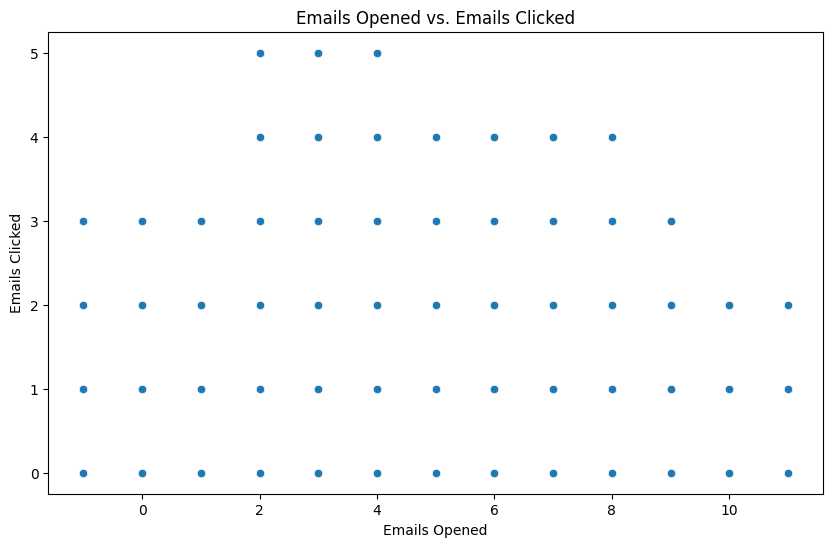

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Emails_Opened'], y=df['Emails_Clicked'])
plt.title('Emails Opened vs. Emails Clicked')
plt.xlabel('Emails Opened')
plt.ylabel('Emails Clicked')
plt.show()

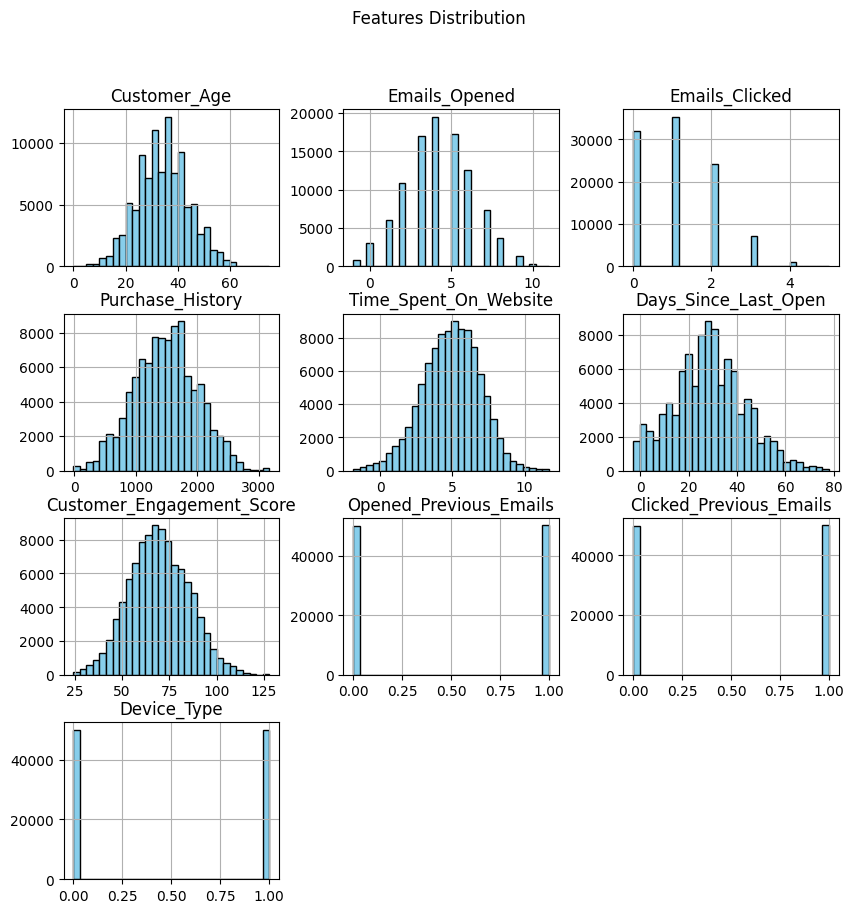

In [15]:
df.hist(figsize=(10,10),bins=30,color="skyblue",edgecolor="black")
plt.suptitle("Features Distribution")
plt.show()

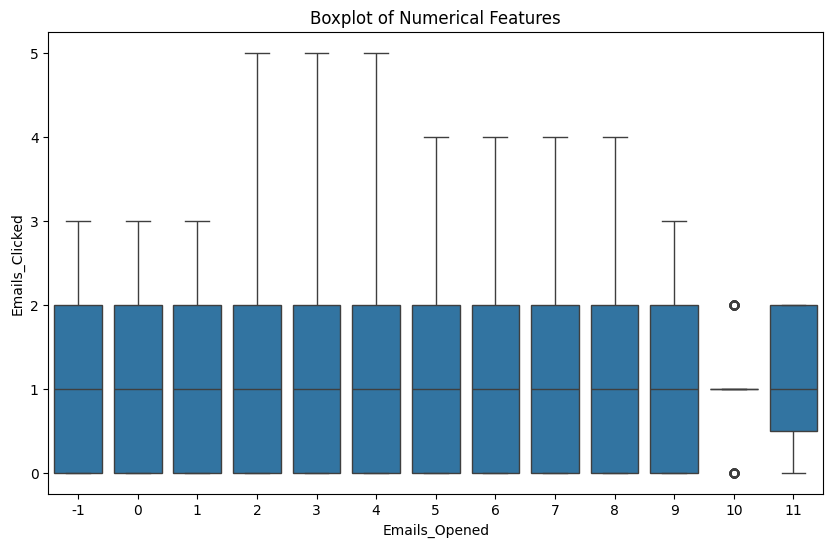

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Emails_Opened"], y=df["Emails_Clicked"])
plt.title("Boxplot of Numerical Features")
plt.show()


In [17]:
df.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,1,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,1,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,1,0,1
4,31,5,0,1601.045636,3.183168,20,51.530231,0,0,0


FEATURE ENGINEERING


In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from numpy import set_printoptions

In [19]:

X = df.drop(columns=['Opened_Previous_Emails'])
y = df['Opened_Previous_Emails']



In [20]:
X

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Clicked_Previous_Emails,Device_Type
0,58,1,2,1872.619118,2.394421,18,59.997401,0,0
1,47,3,3,1325.289574,2.840091,29,69.693176,0,1
2,43,2,1,2486.816106,8.424531,27,83.580196,1,0
3,25,2,0,783.298048,3.903043,0,103.905992,0,1
4,31,5,0,1601.045636,3.183168,20,51.530231,0,0
...,...,...,...,...,...,...,...,...,...
100001,60,7,0,491.648352,5.656840,16,34.128312,0,1
100002,39,2,1,1756.649457,4.996649,12,75.056579,0,0
100003,31,2,0,1408.995621,9.231182,1,96.786007,0,0
100004,37,4,1,1274.000000,4.000000,48,57.600000,0,1


In [21]:
 print((X < 0).sum())



Customer_Age                    0
Emails_Opened                 890
Emails_Clicked                  0
Purchase_History               16
Time_Spent_On_Website        1230
Days_Since_Last_Open         1744
Customer_Engagement_Score       0
Clicked_Previous_Emails         0
Device_Type                     0
dtype: int64


In [22]:
import numpy as np

X[X < 0] = 0


In [23]:
 print((X < 0).sum())



Customer_Age                 0
Emails_Opened                0
Emails_Clicked               0
Purchase_History             0
Time_Spent_On_Website        0
Days_Since_Last_Open         0
Customer_Engagement_Score    0
Clicked_Previous_Emails      0
Device_Type                  0
dtype: int64


In [24]:
X = df[["Emails_Opened", "Emails_Clicked", "Time_Spent_On_Website","Clicked_Previous_Emails","Device_Type","Customer_Engagement_Score"]].values
y = df["Opened_Previous_Emails"].values

In [25]:
X[X < 0] = 0
y[y<0] = 0

In [26]:
 print((X < 0).sum())
print((y<0).sum())


0
0


In [27]:
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, y)
features = test.transform(X)

In [28]:
set_printoptions(precision=3)
print(fit.scores_)
print(features)

[ 1.537  0.217  0.061  2.807  1.535 17.179]
[[ 1.     0.    59.997]
 [ 3.     0.    69.693]
 [ 2.     1.    83.58 ]
 ...
 [ 2.     0.    96.786]
 [ 4.     0.    57.6  ]
 [ 2.     0.    87.549]]


In [29]:
model = LogisticRegression(solver="liblinear")
rfe = RFE(estimator=model, n_features_to_select=1)
fit = rfe.fit(X, y)
print(fit.n_features_)
print(fit.support_)

1
[False False False  True False False]


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-1.543,  0.922, -1.269, -1.001, -1.   , -0.611],
       [-0.567,  1.948, -1.045, -1.001,  1.   ,  0.008],
       [-1.055, -0.103,  1.769,  0.999, -1.   ,  0.896],
       ...,
       [-1.055, -1.129,  2.176, -1.001, -1.   ,  1.741],
       [-0.08 , -0.103, -0.46 , -1.001,  1.   , -0.765],
       [-1.055, -0.103, -1.386, -1.001, -1.   ,  1.15 ]])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(solver="liblinear")
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.49995016942395853
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     10023
           1       0.50      0.50      0.50     10045

    accuracy                           0.50     20068
   macro avg       0.50      0.50      0.50     20068
weighted avg       0.50      0.50      0.50     20068



In [33]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:16:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.4972002799720028


In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.49905321905521227
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.19      0.28     10023
           1       0.50      0.81      0.62     10045

    accuracy                           0.50     20068
   macro avg       0.50      0.50      0.45     20068
weighted avg       0.50      0.50      0.45     20068



In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.5053318716364361
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.49      0.50     10023
           1       0.51      0.52      0.51     10045

    accuracy                           0.51     20068
   macro avg       0.51      0.51      0.51     20068
weighted avg       0.51      0.51      0.51     20068

